[Reference](https://medium.com/@ryan_forrester_/curve-fit-in-python-practical-guide-6a4157560246)

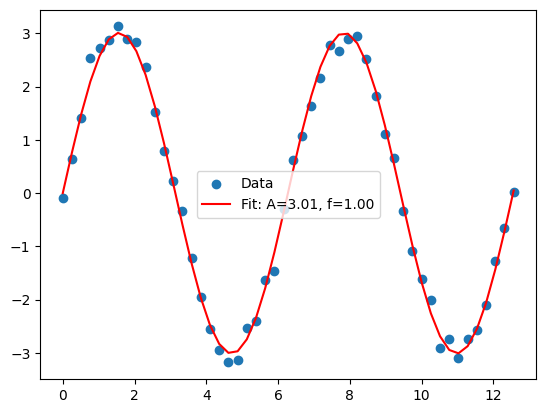

Fitted parameters: amplitude=3.01, frequency=1.00
Parameter uncertainties: [0.03283641 0.00144884]


In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Generate sample data with noise
x_data = np.linspace(0, 4*np.pi, 50)
y_data = 3*np.sin(x_data) + np.random.normal(0, 0.2, 50)

def sine_func(x, amplitude, freq):
    """Basic sine function with amplitude and frequency parameters"""
    return amplitude * np.sin(freq * x)

# Fit the curve
popt, pcov = curve_fit(sine_func, x_data, y_data, p0=[2, 1])
# popt contains the best-fit parameters
# pcov contains the covariance matrix

# Plot results
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, sine_func(x_data, *popt), 'r-',
         label=f'Fit: A={popt[0]:.2f}, f={popt[1]:.2f}')
plt.legend()
plt.show()

print(f"Fitted parameters: amplitude={popt[0]:.2f}, frequency={popt[1]:.2f}")
print(f"Parameter uncertainties: {np.sqrt(np.diag(pcov))}")

In [2]:
def gaussian(x, amplitude, center, width):
    """Gaussian function with amplitude, center, and width"""
    return amplitude * np.exp(-(x - center)**2 / (2 * width**2))

# Generate sample data for a Gaussian peak
x_data = np.linspace(-10, 10, 100)
true_params = [5, 2, 3]  # True parameters
y_data = gaussian(x_data, *true_params) + np.random.normal(0, 0.2, 100)

# Fit with initial guesses
initial_guess = [4, 1, 2]
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Calculate confidence intervals
perr = np.sqrt(np.diag(pcov))
for param, err, name in zip(popt, perr, ['Amplitude', 'Center', 'Width']):
    print(f"{name}: {param:.2f} ± {err:.2f}")

Amplitude: 4.93 ± 0.05
Center: 2.01 ± 0.04
Width: 3.03 ± 0.04


In [3]:
def exponential_decay(t, amplitude, decay_rate):
    """Exponential decay function"""
    return amplitude * np.exp(-decay_rate * t)

# Generate data
t_data = np.linspace(0, 5, 50)
y_data = 10 * np.exp(-0.5 * t_data) + np.random.normal(0, 0.2, 50)

# Fit with bounds
bounds = ([0, 0], [20, 5])  # Lower and upper bounds
popt, pcov = curve_fit(exponential_decay, t_data, y_data,
                      p0=[5, 0.3], bounds=bounds)

print(f"Amplitude: {popt[0]:.2f}")
print(f"Decay rate: {popt[1]:.2f}")

Amplitude: 9.86
Decay rate: 0.49


# Growth Rate Analysis

In [4]:
def logistic_growth(t, K, r, t0):
    """Logistic growth model
    K: carrying capacity
    r: growth rate
    t0: time of max growth"""
    return K / (1 + np.exp(-r * (t - t0)))

# Sample bacterial growth data
time = np.linspace(0, 24, 50)
measured_growth = logistic_growth(time, 100, 0.5, 10) + np.random.normal(0, 5, 50)

# Fit the growth curve
popt, pcov = curve_fit(logistic_growth, time, measured_growth,
                      p0=[90, 0.4, 12])

# Extract parameters
K, r, t0 = popt
print(f"Carrying capacity: {K:.1f}")
print(f"Growth rate: {r:.3f}")
print(f"Time of max growth: {t0:.1f} hours")

Carrying capacity: 100.5
Growth rate: 0.481
Time of max growth: 10.1 hours


# Chemical Reaction Kinetics

In [5]:
def reaction_kinetics(t, k1, k2):
    """Two-step reaction kinetics model"""
    return k1 * (1 - np.exp(-k2 * t))

# Sample reaction data
time = np.linspace(0, 100, 30)
concentration = reaction_kinetics(time, 0.8, 0.05) + np.random.normal(0, 0.02, 30)

# Fit with reasonable bounds
bounds = ([0, 0], [2, 1])
popt, pcov = curve_fit(reaction_kinetics, time, concentration,
                      p0=[0.5, 0.1], bounds=bounds)

print(f"Rate constant k1: {popt[0]:.3f}")
print(f"Rate constant k2: {popt[1]:.3f}")

Rate constant k1: 0.807
Rate constant k2: 0.048


# Temperature Sensor Calibration

In [6]:
def temp_response(x, offset, sensitivity, nonlinearity):
    """Temperature sensor response curve"""
    return offset + sensitivity * x + nonlinearity * x**2

# Calibration data
true_temp = np.linspace(-10, 60, 40)
sensor_output = temp_response(true_temp, 0.5, 1.02, -0.0001) + \
                np.random.normal(0, 0.1, 40)

# Fit calibration curve
popt, pcov = curve_fit(temp_response, true_temp, sensor_output)

print("Calibration parameters:")
print(f"Offset: {popt[0]:.3f}")
print(f"Sensitivity: {popt[1]:.3f}")
print(f"Nonlinearity: {popt[2]:.6f}")

Calibration parameters:
Offset: 0.465
Sensitivity: 1.020
Nonlinearity: -0.000080


In [7]:
from scipy.optimize import OptimizeWarning
import warnings

def problematic_fit():
    """Example of handling fitting problems"""
    try:
        # Attempt fit with poor initial guess
        x_data = np.linspace(0, 10, 50)
        y_data = 1000 * np.exp(-0.5 * x_data) + np.random.normal(0, 1, 50)

        with warnings.catch_warnings():
            warnings.simplefilter("error", OptimizeWarning)

            popt, pcov = curve_fit(exponential_decay, x_data, y_data,
                                 p0=[1, 1])  # Poor initial guess

    except (RuntimeError, OptimizeWarning) as e:
        print(f"Fitting failed: {str(e)}")
        print("Trying again with better initial guess...")

        # Try again with better guess
        popt, pcov = curve_fit(exponential_decay, x_data, y_data,
                             p0=[1000, 0.5])  # Better initial guess

    return popt, pcov

# Usage
popt, pcov = problematic_fit()

<ipython-input-3-d49fa33e1ba2>:3: RuntimeWarning: overflow encountered in exp
  return amplitude * np.exp(-decay_rate * t)


In [8]:
def weighted_fit_example():
    """Example of weighted curve fitting"""
    # Generate data with varying uncertainties
    x_data = np.linspace(0, 10, 20)
    uncertainties = 0.1 + 0.2 * x_data  # Increasing uncertainty
    y_true = 2 * x_data + 1
    y_data = y_true + np.random.normal(0, uncertainties)

    # Define linear model
    def linear(x, m, b):
        return m * x + b

    # Perform weighted fit
    weights = 1 / uncertainties**2
    popt, pcov = curve_fit(linear, x_data, y_data,
                          sigma=uncertainties, absolute_sigma=True)

    print(f"Slope: {popt[0]:.3f} ± {np.sqrt(pcov[0,0]):.3f}")
    print(f"Intercept: {popt[1]:.3f} ± {np.sqrt(pcov[1,1]):.3f}")

    return popt, pcov, x_data, y_data, uncertainties

# Run example
params, cov, x, y, errs = weighted_fit_example()

Slope: 2.058 ± 0.057
Intercept: 0.962 ± 0.088


In [9]:
# Wrong: Initial guess too far from actual values
popt, pcov = curve_fit(exponential_decay, t_data, y_data, p0=[0.1, 0.01])

# Better: Use domain knowledge for initial guess
amplitude_guess = np.max(y_data)
decay_guess = -np.log(y_data[-1]/y_data[0]) / (t_data[-1] - t_data[0])
popt, pcov = curve_fit(exponential_decay, t_data, y_data,
                      p0=[amplitude_guess, decay_guess])